In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
data=pd.read_csv("Fraud_check.csv")
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
data.rename({"Marital.Status":"martial_status",
             "Taxable.Income":"tax_income",
             "City.Population":"city_population",
             "Work.Experience":"work_experience"},axis=1,inplace=True)

# Data visualisation

<AxesSubplot:xlabel='martial_status', ylabel='tax_income'>

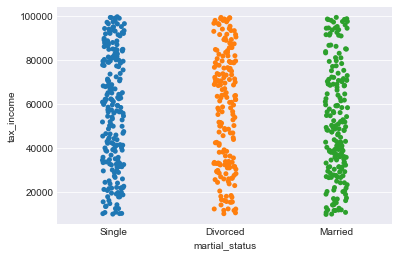

In [4]:
plt.style.use("seaborn-darkgrid")
sns.stripplot(y="tax_income",x="martial_status",data=data,jitter=True)

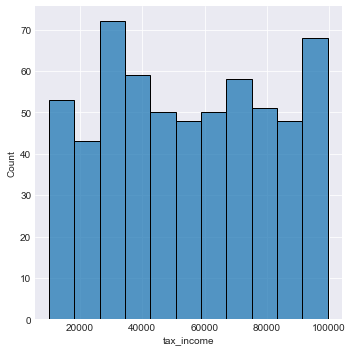

In [5]:
sns.displot(data["tax_income"])

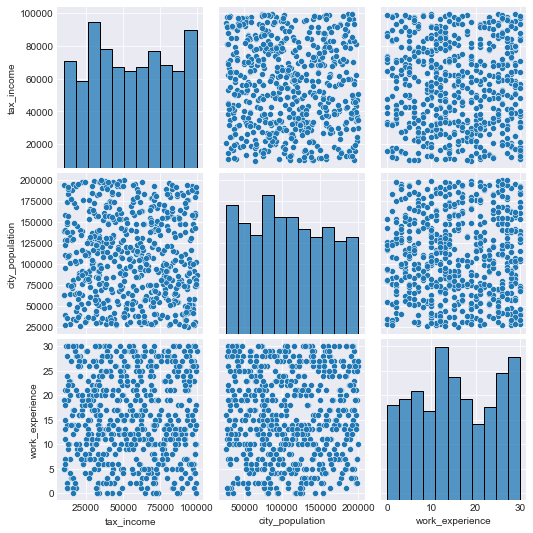

In [6]:
sns.pairplot(data)

In [7]:
label_encoder=preprocessing.LabelEncoder()

In [8]:
data["Undergrad"]=label_encoder.fit_transform(data["Undergrad"])
data["martial_status"]=label_encoder.fit_transform(data["martial_status"])
data["Urban"]=label_encoder.fit_transform(data["Urban"])
data.head()

,Undergrad,martial_status,tax_income,city_population,work_experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0


In [9]:
data["tax_income"]=data["tax_income"].map(lambda x: 1 if x<=30000 else 0)

# Model Building

In [10]:
x=data.drop("tax_income",axis=1)
y=data["tax_income"]

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)

In [12]:
model=DecisionTreeClassifier(criterion="entropy",max_leaf_nodes=10,max_depth=4)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_leaf_nodes=10)

In [13]:
y_train_pred=model.predict(x_train)

In [14]:
 from sklearn.metrics import classification_report as cr
print(cr(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89       334
           1       0.69      0.10      0.18        86

    accuracy                           0.81       420
   macro avg       0.75      0.55      0.54       420
weighted avg       0.79      0.81      0.75       420



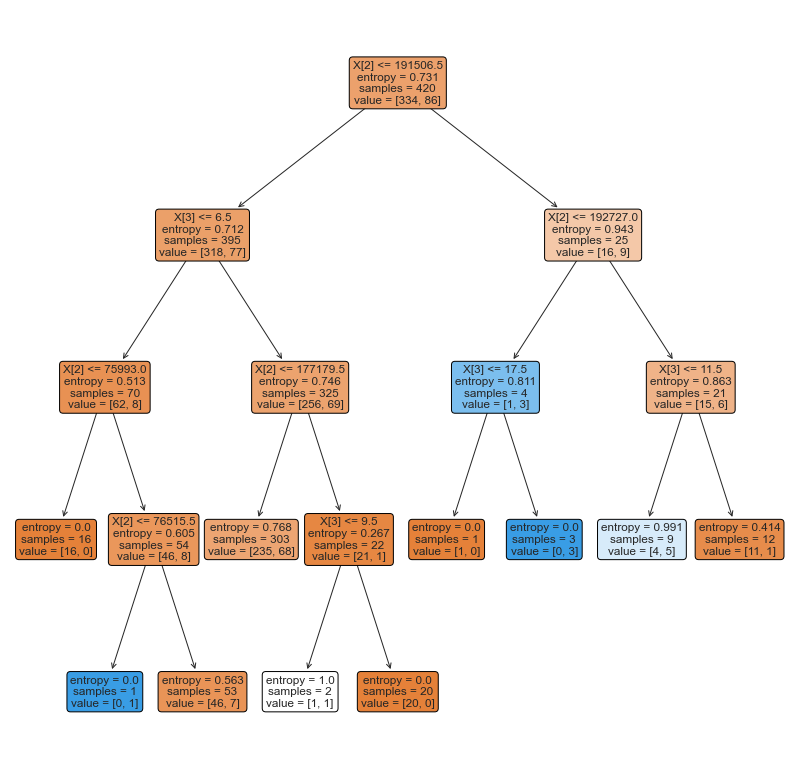

In [15]:
from sklearn.tree import plot_tree
plt.figure(figsize=(14,14))

plot_tree(decision_tree=model, rounded=True, filled=True)
plt.show()

In [16]:
preds=model.predict(x_test)
pd.Series(preds).value_counts()

0    179
1      1
dtype: int64

In [17]:
pd.crosstab(y_test,preds)

col_0,0,1
tax_income,,
0,141,1
1,38,0


In [18]:
np.mean(preds==y_test)

0.7833333333333333

In [19]:
print(model.score(x_train,y_train))
print(model.score(x_test,y_test))

0.8071428571428572
0.7833333333333333
